<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Sukriti_Roy_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import io
import matplotlib
from google.colab import files

In [2]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['heart_2020_cleaned.csv']))
df.head()

Saving heart_2020_cleaned.csv to heart_2020_cleaned.csv


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
df2 = df.groupby(["AgeCategory"]).count().reset_index()

fig1 = px.bar(df2,
             y=df.groupby(["AgeCategory"]).size(),
             x="AgeCategory",
             color='AgeCategory')
fig1.show()

To show that there is too much of the majority sample, hence undersampling is needed.

In [6]:
df1 = df.groupby(["HeartDisease"]).count().reset_index()

fig = px.bar(df1,
             y=df.groupby(["HeartDisease"]).size(),
             x="HeartDisease",
             color='HeartDisease')
fig.show()

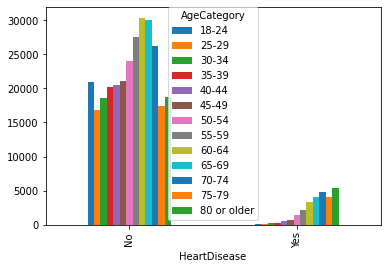

In [7]:
df3 =df.groupby(['HeartDisease','AgeCategory']).size()
df3 =df3.unstack()
df3.plot(kind='bar')

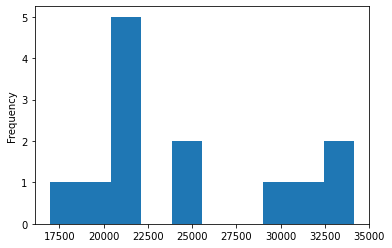

In [8]:
df3 =df.groupby(['AgeCategory']).size()
df3.plot(kind='hist')

In [9]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [10]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
print("Before undersampling: ", Counter(df['HeartDisease']))

undersample = RandomUnderSampler(sampling_strategy= 'majority')

X_rs, y_rs = undersample.fit_resample(X, y)

print("After undersampling:",Counter(y_rs))
 
## new set that is correctly undersampled
sampled_df = X_rs
sampled_df.insert(0, 'HeartDisease', y_rs)
print(sampled_df)

Before undersampling:  Counter({'No': 292422, 'Yes': 27373})
After undersampling: Counter({'No': 27373, 'Yes': 27373})
      HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  33.96      No              No     No             2.0   
1               No  38.01     Yes              No     No             0.0   
2               No  23.23      No              No     No             0.0   
3               No  22.47      No              No     No             0.0   
4               No  29.23      No              No     No             0.0   
...            ...    ...     ...             ...    ...             ...   
54741          Yes  38.45      No              No    Yes            30.0   
54742          Yes  36.21     Yes              No     No             0.0   
54743          Yes  37.12     Yes              No     No             0.0   
54744          Yes  33.20     Yes              No     No             0.0   
54745          Yes  27.41     Yes            

In [11]:
race = sampled_df.groupby(["Race"]).count().reset_index()

fig = px.bar(race,
             y=sampled_df.groupby(["Race"]).size(),
             x="Race",
             color='Race')
fig.show()

Splitting up training and testing data

In [14]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(sampled_df, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 43796
No. of testing examples: 10950


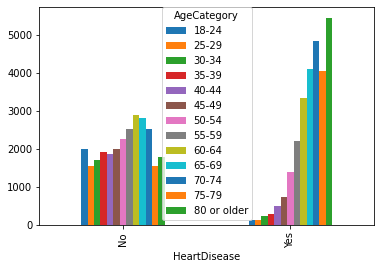

In [15]:
df1 = sampled_df.groupby(['HeartDisease','AgeCategory']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

Age plot shows that the higher the age, the more likely one gets heart disease. 

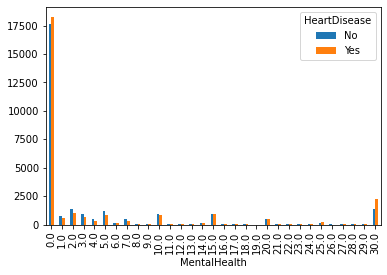

In [25]:
df1 = sampled_df.groupby(['MentalHealth','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

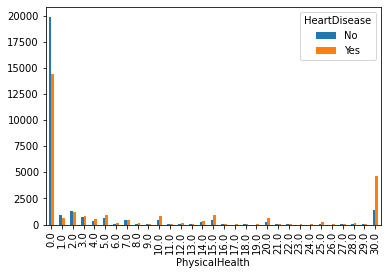

In [65]:
df1 = sampled_df.groupby(['PhysicalHealth','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

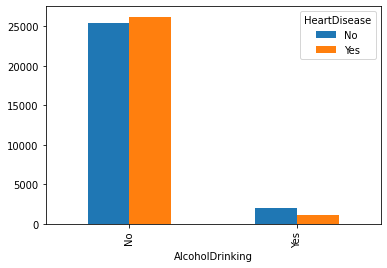

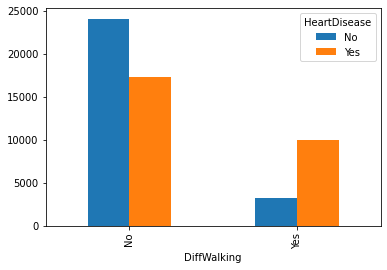

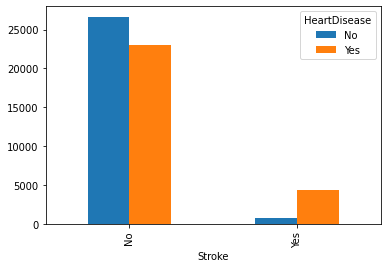

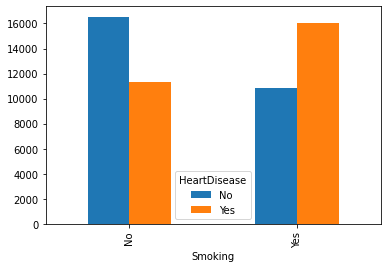

In [60]:
df1 = sampled_df.groupby(['AlcoholDrinking','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

df1 = sampled_df.groupby(['DiffWalking','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

df1 = sampled_df.groupby(['Stroke','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

df1 = sampled_df.groupby(['Smoking','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

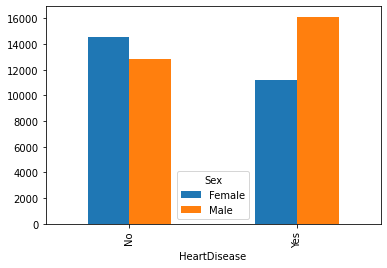

In [51]:
df1 = sampled_df.groupby(['HeartDisease','Sex']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

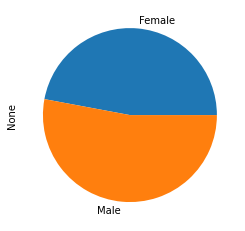

In [59]:
df2 = sampled_df.groupby(['Sex']).size()
#df1 =df1.unstack()
df2.plot(kind='pie')

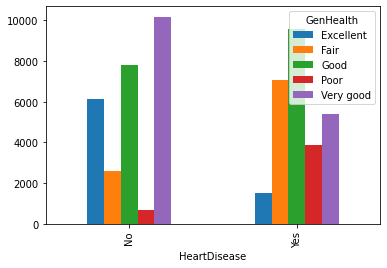

In [57]:
df1 = sampled_df.groupby(['HeartDisease','GenHealth']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

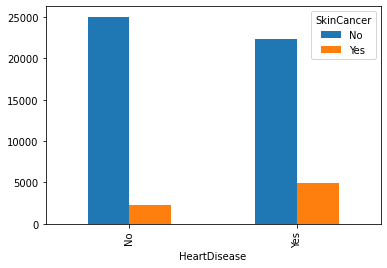

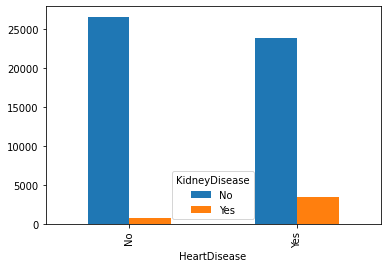

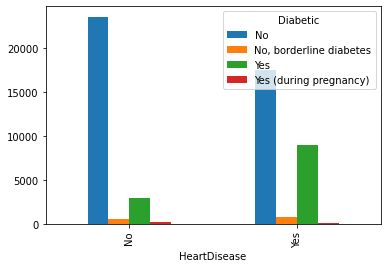

In [58]:
df1 = sampled_df.groupby(['HeartDisease','SkinCancer']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

df1 = sampled_df.groupby(['HeartDisease','KidneyDisease']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

df1 = sampled_df.groupby(['HeartDisease','Diabetic']).size()
df1 =df1.unstack()
df1.plot(kind='bar')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



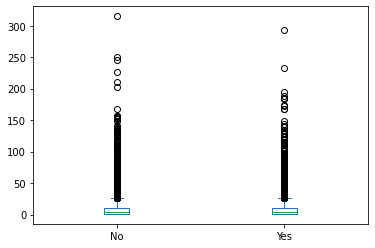

In [77]:
df1 = sampled_df.groupby(['BMI','HeartDisease']).size()
df1 =df1.unstack()
df1.plot(kind='box')

In [73]:
print(sampled_df.shape)

(54746, 18)


In [80]:
df_filtered = sampled_df[sampled_df['BMI'] <= 60]
print(df_filtered.head(15))

print(df_filtered.shape)

sampled_df = df_filtered

   HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0            No  33.96      No              No     No             2.0   
1            No  38.01     Yes              No     No             0.0   
2            No  23.23      No              No     No             0.0   
3            No  22.47      No              No     No             0.0   
4            No  29.23      No              No     No             0.0   
5            No  21.29      No              No     No             0.0   
6            No  25.83     Yes              No     No             0.0   
7            No  25.07      No             Yes     No             0.0   
8            No  23.71     Yes             Yes     No             0.0   
9            No  31.10     Yes              No     No             0.0   
10           No  41.60      No              No     No             0.0   
11           No  22.07     Yes              No     No             0.0   
12           No  29.12      No              No     